In [1]:
from datasrcs.spc import load_full_tors

from plotting.maps import CartopyMap
from plotting.mapareas import conus, chase_alley
from plotting.utils import sample_colors

from shapely.geometry import MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%env WORKDIR=~/weatherpy-work

env: WORKDIR=~/weatherpy-work


## Load SPC tornado data and prepare functions

In [2]:
df = load_full_tors()
df['dayofyear'] = df.date_time.dt.dayofyear
df.head()

,date_time,yr,mo,dy,tz,st,stf,stn,mag,inj,...,wid,ns,sn,sg,f1,f2,f3,f4,fc,dayofyear
om,,,,,,,,,,,,,,,,,,,,,
1,1950-01-03 11:00:00,1950,1,3,3,MO,29,1,3,3,...,150,2,0,1,0,0,0,0,0,3
2,1950-01-03 11:55:00,1950,1,3,3,IL,17,2,3,3,...,130,1,1,1,135,0,0,0,0,3
3,1950-01-03 16:00:00,1950,1,3,3,OH,39,1,1,1,...,10,1,1,1,161,0,0,0,0,3
4,1950-01-13 05:25:00,1950,1,13,3,AR,5,1,3,1,...,17,1,1,1,113,0,0,0,0,13
5,1950-01-25 19:30:00,1950,1,25,3,MO,29,2,2,5,...,300,1,1,1,93,0,0,0,0,25


In [3]:
df.columns

Index(['date_time', 'yr', 'mo', 'dy', 'tz', 'st', 'stf', 'stn', 'mag', 'inj',
       'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len', 'wid',
       'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc', 'dayofyear'],
      dtype='object')

### Day 90 = March 30 (Apr. 1 on leap years). Day 180 = June 30.

In [4]:
firstday = 90
lastday = 180
days = range(firstday, lastday + 1)

In [5]:
def com(data, day, pm=3):
    tors = data[(data.dayofyear >= day - 3) & (data.dayofyear <= day + 3)]
    mpt = MultiPoint(tors[['slon', 'slat']].values)
    return mpt.centroid.y, mpt.centroid.x, len(tors)

def centroids(data, days):
    results = []
    for dy in days:
        centroid_lat, centroid_lon, n = com(data, dy)
        results.append({'day': dy, 'lat': centroid_lat, 'lon': centroid_lon, 'ntor': n})
    return pd.DataFrame(results)

## Results for all tornadoes 1950-

In [6]:
full_results = centroids(df, days)

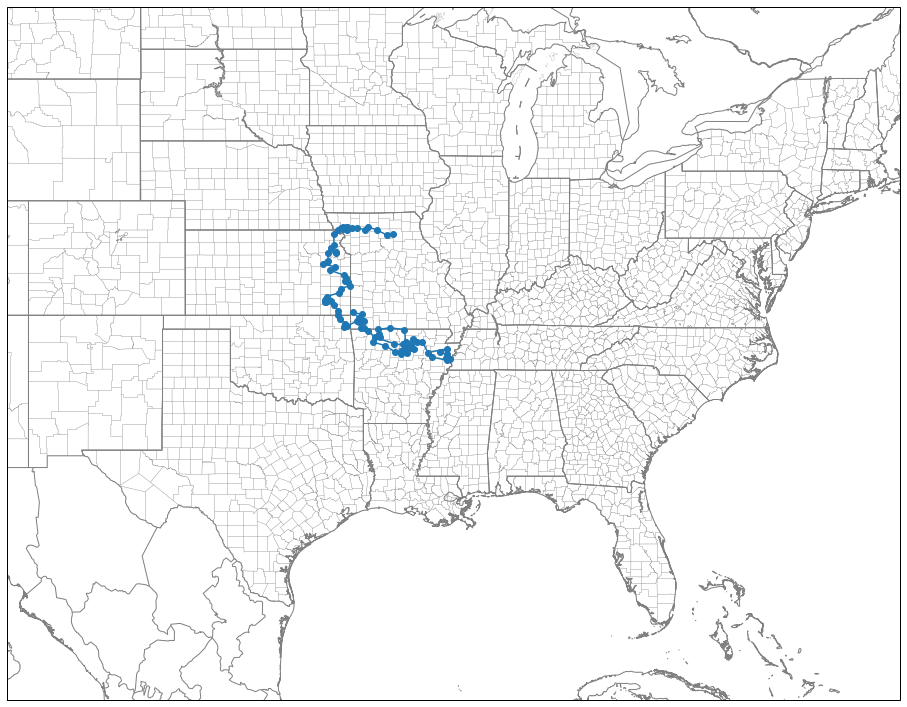

In [7]:
fig = plt.figure(figsize=(16, 16))
bgmap = CartopyMap(bbox=(-110, -70, 22, 45.5))
bgmap.draw(layers=['default', 'counties'])
bgmap.plotlatlons(full_results.lat, full_results.lon, marker='o')

## Results for only "Chase Alley"

In [8]:
bdys, chasealley = chase_alley()
tors_chasealley = df.spc.filter_region(chasealley)
chasealley_results = centroids(tors_chasealley, days)

In [11]:
chasealley_results.head()

,day,lat,lon,ntor
0,90,36.666036,-98.043932,439
1,91,36.636182,-97.182208,376
2,92,36.560001,-97.226295,385
3,93,36.409661,-97.410123,353
4,94,36.431752,-97.422747,358


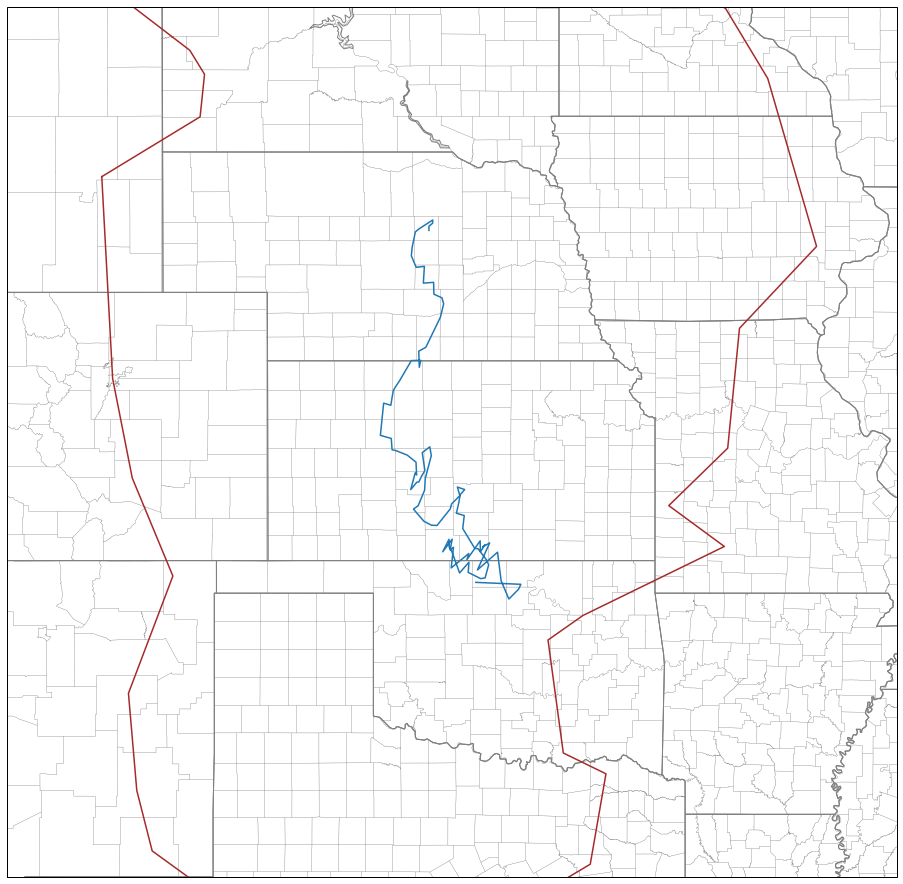

In [10]:
fig = plt.figure(figsize=(16, 16))
bgmap = CartopyMap(bbox=(-107, -90, 32, 45))
bgmap.draw(['default', 'counties'])
bgmap.plotlatlons(bdys.lat, bdys.lon, color='brown')

bgmap.plotlatlons(chasealley_results.lat, chasealley_results.lon)

# colors = sample_colors(n=len(chasealley_results), src_cmap='viridis')
# latlons = chasealley_results[['lat', 'lon']].iterrows()

# for (_, latlon), color in zip(latlons, colors):
#     bgmap.plotlatlons(latlon.lat, latlon.lon, color=color)